# SHowing the trends with the dataframe

In [2]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import psycopg2

In [3]:
#establishing the connection
conn = psycopg2.connect(
   database="movies_db", user='postgres', password='finalproject', host='moviesdb.ct0o6q0pbonx.us-east-2.rds.amazonaws.com', port= '5432'
)


In [4]:
#Setting auto commit false
conn.autocommit = True

In [5]:
#Creating a cursor object using the cursor() method
cursor = conn.cursor()

In [6]:
cursor.execute('''select m.id, m.title, m.status, m.release_date, m.vote_average,m.revenue,m.vote_count,m.budget
from movies_metadata m''')

In [7]:
#Fetching 1st row from the table
result = cursor.fetchone();
print(result)

('862', 'Toy Story', 'Released', datetime.date(1995, 10, 30), Decimal('7.7'), Decimal('373554033.0'), Decimal('5415.0'), 30000000)


In [8]:
#Fetching all rows from the table
result = cursor.fetchall();
print(result)

[('8844', 'Jumanji', 'Released', datetime.date(1995, 12, 15), Decimal('6.9'), Decimal('262797249.0'), Decimal('2413.0'), 65000000), ('31357', 'Waiting to Exhale', 'Released', datetime.date(1995, 12, 22), Decimal('6.1'), Decimal('81452156.0'), Decimal('34.0'), 16000000), ('11862', 'Father of the Bride Part II', 'Released', datetime.date(1995, 2, 10), Decimal('5.7'), Decimal('76578911.0'), Decimal('173.0'), 0), ('949', 'Heat', 'Released', datetime.date(1995, 12, 15), Decimal('7.7'), Decimal('187436818.0'), Decimal('1886.0'), 60000000), ('9091', 'Sudden Death', 'Released', datetime.date(1995, 12, 22), Decimal('5.5'), Decimal('64350171.0'), Decimal('174.0'), 35000000), ('710', 'GoldenEye', 'Released', datetime.date(1995, 11, 16), Decimal('6.6'), Decimal('352194034.0'), Decimal('1194.0'), 58000000), ('9087', 'The American President', 'Released', datetime.date(1995, 11, 17), Decimal('6.5'), Decimal('107879496.0'), Decimal('199.0'), 62000000), ('21032', 'Balto', 'Released', datetime.date(1995

In [9]:
data = pd.DataFrame(result,columns=["id","Title","Status","Release Date","Budget","Revenue", "Vote Average","Vote Count"])
data.head()

,id,Title,Status,Release Date,Budget,Revenue,Vote Average,Vote Count
0,8844,Jumanji,Released,1995-12-15,6.9,262797249.0,2413.0,65000000
1,31357,Waiting to Exhale,Released,1995-12-22,6.1,81452156.0,34.0,16000000
2,11862,Father of the Bride Part II,Released,1995-02-10,5.7,76578911.0,173.0,0
3,949,Heat,Released,1995-12-15,7.7,187436818.0,1886.0,60000000
4,9091,Sudden Death,Released,1995-12-22,5.5,64350171.0,174.0,35000000


In [10]:
#showcasing the size of the file
data.shape

(7396, 8)

# Showing the trend of voting average  to movies

AttributeError: 'Rectangle' object has no property 'columns'

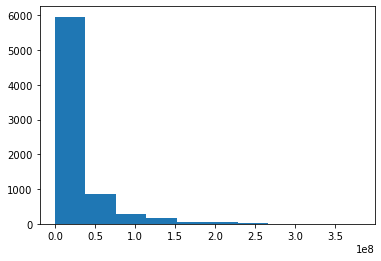

In [14]:
# charting vote average column
data.hist(columns='Vote Average')

# Showing revenue trend within the movies

AttributeError: 'Rectangle' object has no property 'columns'

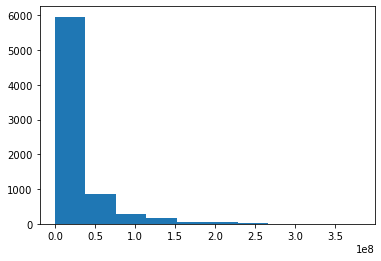

In [18]:
# charting revenue column
data.hist(columns='Revenue')

# Showing the trend of voter count within movies

AttributeError: 'Rectangle' object has no property 'columns'

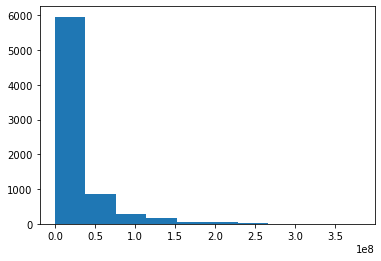

In [20]:
# Charting vote count column
data.hist(columns='Vote Count')

# Graphing budget and revenue in a scatter plot to show the relationship of each other in the dateframe of movies

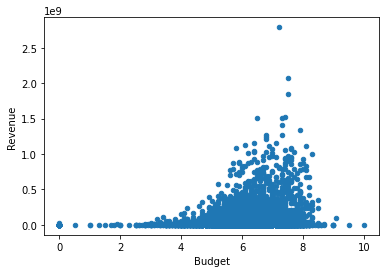

In [22]:
# charting a scatter graph budget vs gross
data.plot.scatter(x='Budget', y='Revenue')

# Charting the relationship of title to revenue in a scatter plot graph

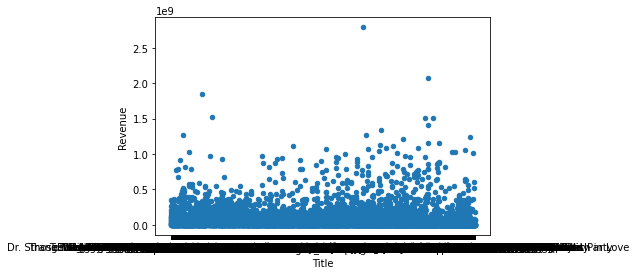

In [23]:
# Charting a scatter graph title year vs gross
data.plot.scatter(x='Title', y='Revenue')
plt.show()

# Graphing a Heatmap to show the staic relationship of movies features

KeyError: 'Revenue'

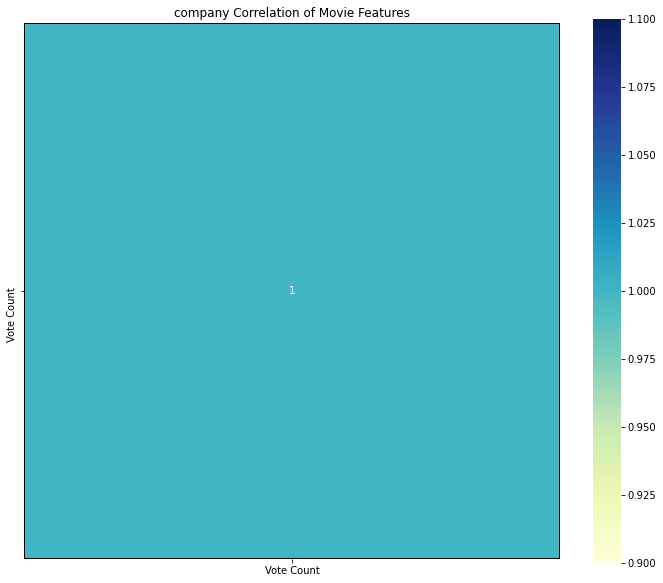

In [26]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('company Correlation of Movie Features')

# Draw the heatmap using seaborn
sns.heatmap(data.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

#  The heat map depicting a diagonal coordination indicated there may be a correlation in the data

#  To show corellation polarity values with the 'gross'
data.corr()['Revenue'].sort_values(ascending=False)  
